In [3]:
import pandas as pd

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,SGDRegressor

from sklearn.preprocessing import PolynomialFeatures,StandardScaler

from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [5]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

Text(0, 0.5, 'y')

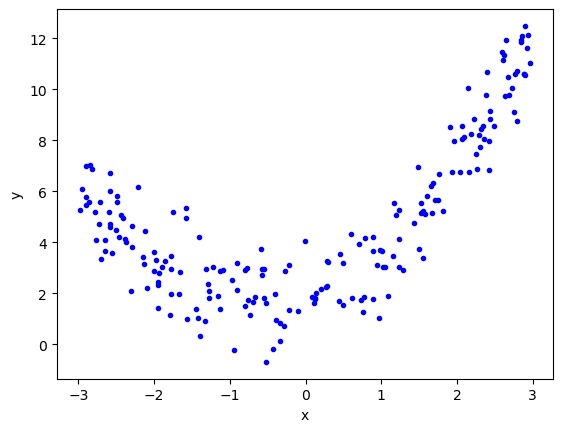

In [6]:
plt.plot(X,y,'b.')
plt.xlabel('x')
plt.ylabel('y')

In [7]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2 , random_state=2)

In [8]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [9]:
y_pred=lr.predict(x_test)

In [10]:
r2_score(y_test,y_pred)

0.21247150173609164

Text(0.5, 0, 'x')

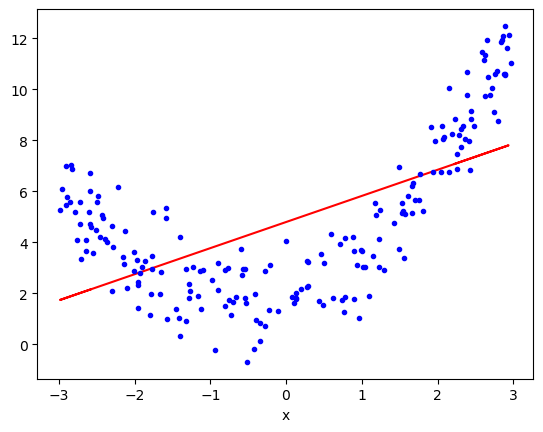

In [12]:
plt.plot(x_train , lr.predict(x_train),color='red' )
plt.plot(X,y,'b.')
plt.xlabel('x')

In [13]:
# Appling Polynomial linearn Regression
# apply degree 2
poly = PolynomialFeatures(degree=2)


In [14]:
x_train_trans=poly.fit_transform(x_train)
x_test_trans=poly.fit_transform(x_test)

In [16]:
print(x_train[0])
print(x_train_trans[0])

[2.22412647]
[1.         2.22412647 4.94673856]


In [17]:
lr.fit(x_train_trans,y_train)

LinearRegression()

In [20]:
y_pre=lr.predict(x_test_trans)
r2_score(y_pre,y_test)*100

82.33995613161545

In [21]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.95211713 0.80846188]]
[1.91928302]


In [22]:
x_new =np.linspace(-3,3,200).reshape(200,1)
x_new_poly=poly.transform(x_new)
y_new=lr.predict(x_new_poly)

<function matplotlib.pyplot.show(close=None, block=None)>

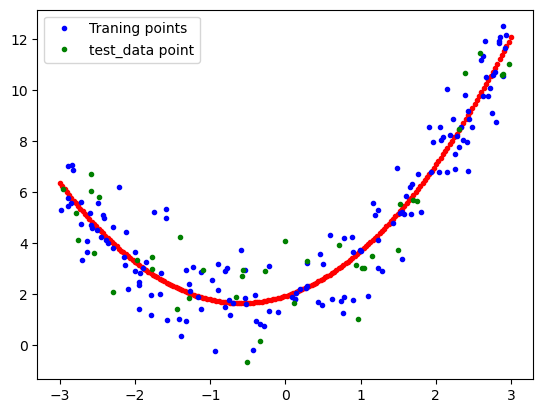

In [26]:
plt.plot(x_new,y_new ,'r.')
plt.plot(x_train ,y_train,'b.',label='Traning points')
plt.plot(x_test,y_test,'g.',label='test_data point')
plt.legend()
plt.show

In [31]:
import plotly.express as px

In [60]:
x1 = 6 * np.random.rand(200, 1) - 3
y1 = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

In [65]:
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(-1,1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(x1, y1)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(x_train, y_train, "b.", linewidth=3)
    plt.plot(x_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

In [66]:
polynomial_regression(3)

ValueError: Found input variables with inconsistent numbers of samples: [200, 100]

C:\Users\raj\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


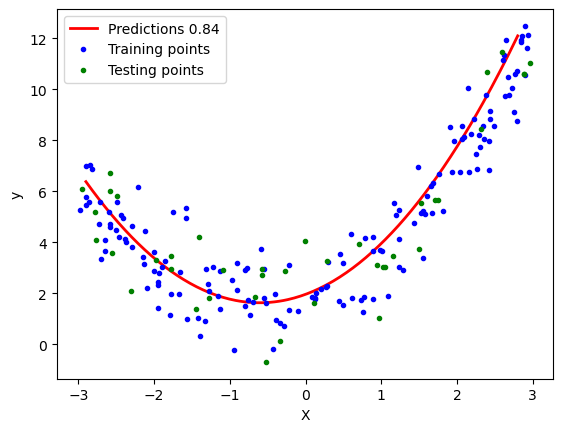

In [55]:
poly = PolynomialFeatures(degree=200)

X_train_trans = poly.fit_transform(x_train)
X_test_trans = poly.transform(x_test)

sgd = SGDRegressor(max_iter=100)
sgd.fit(x_train_trans,y_train)

X_new=np.linspace(-2.9, 2.8, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = sgd.predict(x_new_poly)

y_pred = sgd.predict(x_test_trans)

plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions " + str(round(r2_score(y_test,y_pred),2)))
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [71]:
# 3D polynomial regression
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)
# z = x^2 + y^2 + 0.2x + 0.2y + 0.1xy + 2

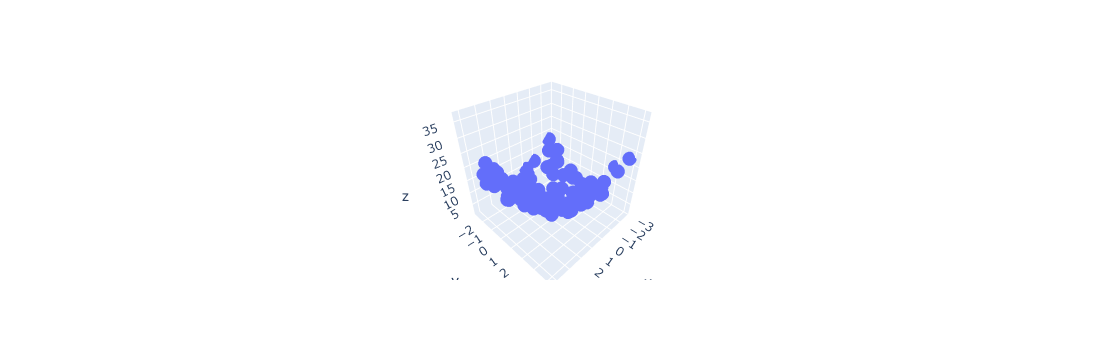

In [72]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()


In [73]:
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)

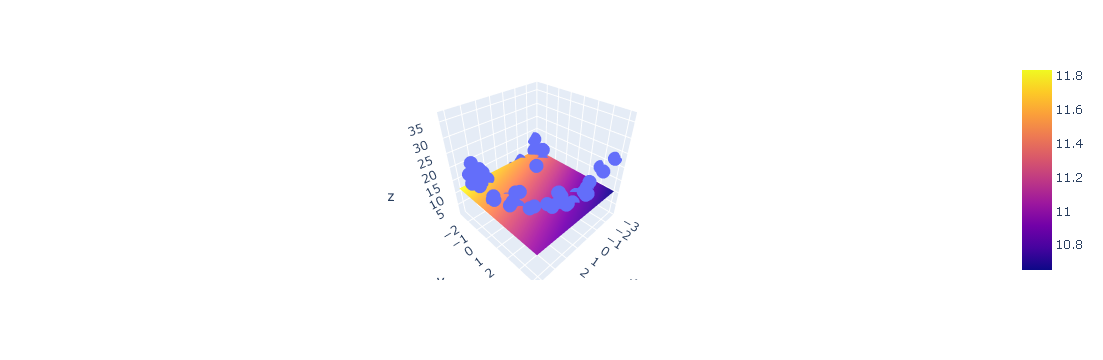

In [74]:
import plotly.graph_objects as go

fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final ))

fig.show()